# Get to know the Operations

In this tutorial, we use the quantum circuits we learned in the previous tutorial and get aquainted with the different kinds of quantum operations we can use in PennyLane through examples. For a full list of quantum operations, see [pennylane.ops](https://pennylane.readthedocs.io/en/latest/code/ops.html#module-pennylane.ops) and [pennylane.expval](https://pennylane.readthedocs.io/en/latest/code/expval.html#module-pennylane.expval)

In [1]:
# lets first import the essentials

import pennylane as qml
from pennylane import numpy as np

### Discrete Variable Quantum Operations

#### 1. RX, PauliZ 

Lets look at the example we saw in the first tutorial in deatil:

> [RX](https://pennylane.readthedocs.io/en/latest/code/ops/qubit.html#pennylane.ops.qubit.RX) function in pennyLane applies $e^{-i\phi\frac{\sigma_x}{2}}$ phase operation to the given single qubit 

> [expval.PauliZ](https://pennylane.readthedocs.io/en/latest/code/expval/qubit.html#pennylane.expval.qubit.PauliZ) calculates the expectation value of the Pauli Z operator on the given quantum state

In [2]:
dev1 = qml.device('default.qubit', wires=1)

@qml.qnode(dev1)
def circuit(param):
    qml.RX(param, wires=0)
    return qml.expval.PauliZ(0)

In [3]:
circuit(np.pi)

-1.0

Lets explicitly look at what is happening behind the scence in this example when we call the `circuit` function with argument $\pi$:

$$ RX(\pi)=\begin{pmatrix} \cos(\frac{\pi}{2}) &  -i\sin(\frac{\pi}{2}) \\ -i\sin(\frac{\pi}{2}) & \cos(\frac{\pi}{2}) \end{pmatrix}$$

$$ RX(\pi)|0\rangle=\begin{pmatrix} \cos(\frac{\pi}{2}) &  -i\sin(\frac{\pi}{2}) \\ -i\sin(\frac{\pi}{2}) & \cos(\frac{\pi}{2}) \end{pmatrix}\begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ -i\end{pmatrix} $$

$$\langle\begin{pmatrix} 0 & i\end{pmatrix}\mid\hat{\sigma}_z\mid\begin{pmatrix} 0 \\ -i\end{pmatrix}\rangle = -1$$

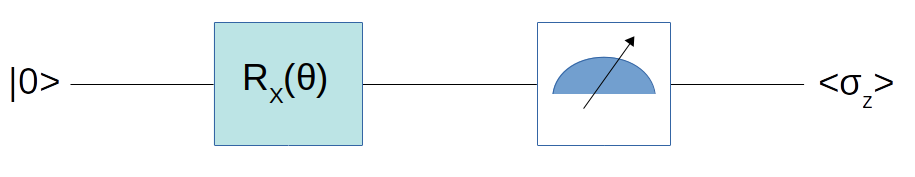

#### 2. H, CNOT, Multiple Expectation Values

> [Hadamard](https://pennylane.readthedocs.io/en/latest/code/ops/qubit.html#pennylane.ops.qubit.Hadamard) operator takes in one qubit. It maps $|0\rangle$ to $|+\rangle$ and $|1\rangle$ to $|-\rangle$

> [CNOT](https://pennylane.readthedocs.io/en/latest/code/ops/qubit.html#pennylane.ops.qubit.CNOT)  is the two-qubit Controlled-Not operator

> PennyLane supports the return of multiple expectation values, up to one per wire.

In [4]:
dev2 = qml.device('default.qubit', wires=2)

@qml.qnode(dev2)
def entangle_local():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    return qml.expval.PauliZ(0), qml.expval.PauliZ(1)

This produces the completely entangled Bell state $|\Phi^{+}\rangle = \frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)$

In [5]:
entangle_local()

array([0., 0.])

In `entangle_local`, expectation values of Pauli Z are measured locally, i.e. this circuit is evaluating 

$\langle\sigma_z\rangle _0 = \langle\sigma_z \otimes \hat{I} \rangle$, $\langle\sigma_z\rangle _1 = \langle\hat{I}\otimes\sigma_z\rangle$      and <font color=brown>**not**</font> 
$\langle\sigma_z \otimes \sigma_z \rangle _{01}$

As a result, the reduced states of $|\Phi^{+}\rangle$ on each subsystem are completely mixed and local expectation values average to zero.

In order to measure $\langle\sigma_z \otimes \sigma_z \rangle _{01}$, we can use the Hermitian operator shown below. 

#### 3. Hermitian Operator 

> [expval.Hermitian](https://pennylane.readthedocs.io/en/latest/code/expval/qubit.html#pennylane.expval.qubit.Hermitian) lets us calculate the expectation value of any customized Hermitian operator 

In [6]:
dev3 = qml.device('default.qubit', wires=2)

@qml.qnode(dev3)
def entangle_global(A):
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    return qml.expval.Hermitian(A, wires=[0,1])

In [7]:
# Pauli Z operator
sigma_Z = np.array([[1,0],[0, -1]])

# Define the Hermitian matrix of tensor product of Pauli Z operators
sigma_ZZ = np.kron(sigma_Z,sigma_Z)

#call the function with this operator
entangle_global(sigma_ZZ)

0.9999999999999998

This makes sense as $\langle \Phi^{+}\mid\sigma_z \otimes \sigma_z\mid\Phi^{+}\rangle = 1$.  Both spins are either up or down.

<font color=brown>**NOTE:** Better practice will be to explicitly mention `A=None` in the arguments of `entangle_global` function to inform pennyLane **not** to use this matrix as a differential argument. See `Keyword arguments` in [Advanced features](https://pennylane.readthedocs.io/en/latest/tutorials/advanced_usage.html#keyword-arguments) tutorial.</font>

### Continuous Variable Quantum Operations

#### 1. Displacement Operator, MeanPhoton

> [Displacement](https://pennylane.readthedocs.io/en/latest/code/ops/cv.html#pennylane.ops.cv.Displacement) operator for the Gaussian state in the phase space. It applies $exp(\alpha\hat{a}^{\dagger}-\alpha^{*}\hat{a}^{\dagger})$ to the Gaussian state where $\alpha = ae^{i\phi}$

> [expval.MeanPhoton](https://pennylane.readthedocs.io/en/latest/code/expval/cv.html#pennylane.expval.cv.MeanPhoton) returns the expectation value of the number operator $\langle \hat{n} \rangle$

In [8]:
dev4 = qml.device('default.gaussian', wires=1)

@qml.qnode(dev4)
def displace_func(mag_alpha, phase_alpha):
    qml.Displacement(mag_alpha, phase_alpha, wires=0)
    return qml.expval.MeanPhoton(0)

In [9]:
displace_func(1,0)

1.0

This makes sense as $\hat{D}(1,0) \mid0\rangle= \mid1\rangle$ and hence we measure one photon in the system. 

#### 2. Heisenberg Uncertainty for squeezed states

> [Squeezing](https://pennylane.readthedocs.io/en/latest/code/ops/cv.html#pennylane.ops.cv.Squeezing) operator implements phase space squeezing

> [expval.X](https://pennylane.readthedocs.io/en/latest/code/expval/cv.html#pennylane.expval.cv.X) and [expval.P](https://pennylane.readthedocs.io/en/latest/code/expval/cv.html#pennylane.expval.cv.P) calculate the expectation value of position and momentum in the phase space, respectively

> [expval.PolyXP](https://pennylane.readthedocs.io/en/latest/code/expval/cv.html#pennylane.expval.cv.PolyXP) can be used to calculate higher order X/P expectation values. It requires a  matrix as input to determine what expectations to calculate and returns a sum of all the activated terms. For example: for the given matrix $$A=\begin{pmatrix} 0 & 1 & 0 \\ 1 & 1 & 0\\ 0 & 0 & 1 \end{pmatrix}$$
PolyXP will return $\langle \hat{x} \rangle + \langle \hat{x}^2 \rangle + \langle \hat{p}^2 \rangle$

<font color=brown>**NOTE:** In PennyLane, $\hbar = 2$</font>

In [10]:
# We can create multiple QNodes on the same device 

dev5 = qml.device('default.gaussian', wires=1)

@qml.qnode(dev5)
def before_squeezing_X(mag_alpha, phase_alpha):
    qml.Displacement(mag_alpha, phase_alpha, wires=0)
    return qml.expval.X(0)

@qml.qnode(dev5)
def before_squeezing_X2(mag_alpha, phase_alpha, q=None):
    qml.Displacement(mag_alpha, phase_alpha, wires=0)
    return qml.expval.PolyXP(q,wires=0)

@qml.qnode(dev5)
def before_squeezing_P(mag_alpha, phase_alpha):
    qml.Displacement(mag_alpha, phase_alpha, wires=0)
    return qml.expval.P(0)

@qml.qnode(dev5)
def before_squeezing_P2(mag_alpha, phase_alpha, q=None):
    qml.Displacement(mag_alpha, phase_alpha, wires=0)
    return qml.expval.PolyXP(q,wires=0)

<font color=brown>**NOTE:** We explicitly mention `q=None` in the arguments to inform pennyLane **not** to use it as a differential argument. See `Keyword arguments` in [Advanced features](https://pennylane.readthedocs.io/en/latest/tutorials/advanced_usage.html#keyword-arguments) tutorial.</font>

In [11]:
# lets make the corresponding matrix for PolyXP to get <X^2> 
q_X2 = np.array([[0,0,0],[0,1,0],[0,0,0]])
print(q_X2)

mean_X = before_squeezing_X(1,0) 
print(mean_X)

#explicitly state q when calling the function
mean_X2 = before_squeezing_X2(1,0, q=q_X2)
print(mean_X2)

[[0 0 0]
 [0 1 0]
 [0 0 0]]
2.0
5.0


Now we can calculate the satndard deviation using $\sqrt{\langle\hat{x}^2\rangle - \langle\hat{x}\rangle^2}$

In [12]:
# calculate the standard deviation in Position
std_X = np.sqrt((mean_X2-(mean_X)**2))
print(std_X)

1.0


In [13]:
# lets make the corresponding matrices for PolyXP to get <P^2>
q_P2 = np.array([[0,0,0],[0,0,0],[0,0,1]])
print(q_P2)

mean_P = before_squeezing_P(1,0) 
print(mean_P)

#explicitly state q when calling the function
mean_P2 = before_squeezing_P2(1,0, q=q_P2)
print(mean_P2)

[[0 0 0]
 [0 0 0]
 [0 0 1]]
1.2246467991473532e-16
1.0


In [14]:
# calculate the standard deviation in Momentum
std_P = np.sqrt((mean_P2-(mean_P)**2))
print(std_P)

1.0


This makes sense as for any Gaussian state, Position and Momentum can be measured with equal uncertainty. $\sigma_x\sigma_p =1$

**Now**, lets squeeze the displaced state we have seen so far with `squeezing magnitude` 1 and `squeezing phase` 0 :

In [15]:
dev6 = qml.device('default.gaussian', wires=1)

@qml.qnode(dev6)
def after_squeezing_X(mag_alpha, phase_alpha, mag_z, phase_z, q=None):
    qml.Displacement(mag_alpha, phase_alpha, wires=0)
    qml.Squeezing(mag_z, phase_z, wires=0)
    return qml.expval.X(0)

@qml.qnode(dev6)
def after_squeezing_X2(mag_alpha, phase_alpha, mag_z, phase_z, q=None):
    qml.Displacement(mag_alpha, phase_alpha, wires=0)
    qml.Squeezing(mag_z, phase_z, wires=0)
    return qml.expval.PolyXP(q,wires=0)

@qml.qnode(dev6)
def after_squeezing_P(mag_alpha, phase_alpha, mag_z, phase_z, q=None):
    qml.Displacement(mag_alpha, phase_alpha, wires=0)
    qml.Squeezing(mag_z, phase_z, wires=0)
    return qml.expval.P(0)

@qml.qnode(dev6)
def after_squeezing_P2(mag_alpha, phase_alpha, mag_z, phase_z, q=None):
    qml.Displacement(mag_alpha, phase_alpha, wires=0)
    qml.Squeezing(mag_z, phase_z, wires=0)
    return qml.expval.PolyXP(q,wires=0)

In [16]:
mean_X_S = after_squeezing_X(1,0,1,0,q=q_X2) 
print(mean_X_S)

mean_X2_S = after_squeezing_X2(1,0,1,0, q=q_X2)
print(mean_X2_S)

0.7357588823428847
0.6766764161830635


In [17]:
mean_P_S = after_squeezing_P(1,0,1,0,q=q_P2) 
print(mean_P_S)

mean_P2_S = after_squeezing_P2(1,0,1,0, q=q_P2)
print(mean_P2_S)

4.505223801027239e-17
7.3890560989306495


In [18]:
# calculate the standard deviation in Position after squeezing
std_X_S = np.sqrt((mean_X2_S-(mean_X_S)**2))
print(std_X_S)

# calculate the standard deviation in Momentum after squeezing
std_P_S = np.sqrt((mean_P2_S-(mean_P_S)**2))
print(std_P_S)

0.36787944117144233
2.718281828459045


Hence, **after** squeezing the uncertainty in Position has decreased and uncertainty in momentum has increased as shown below:

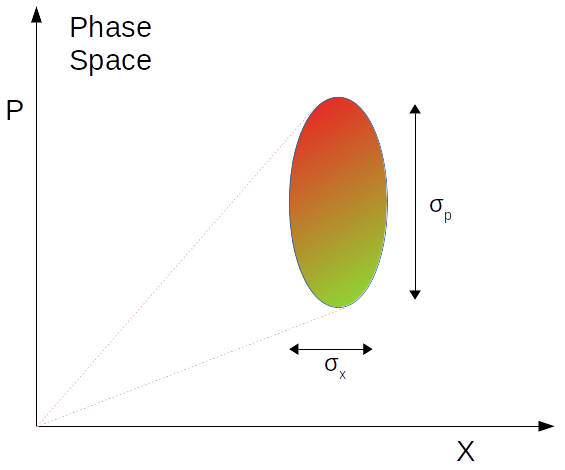

In [19]:
#check that the Heisenberg Principle still holds; std_p*std_x =1
std_P_S * std_X_S

1.0

#### 3. Beam Splitter

> [BeamSplitter](https://pennylane.readthedocs.io/en/latest/code/ops/cv.html#pennylane.ops.cv.Beamsplitter) operator acts on two input modes with chracterized reflection $r=e^{i\phi}\sin(\theta)$ and transmission $t=\cos(\theta)$

In [20]:
dev7 = qml.device('default.gaussian', wires=2)

#without Beamsplitter
@qml.qnode(dev7)
def func_NO_BS(mag_alpha, phase_alpha):
    qml.Displacement(mag_alpha, phase_alpha, wires=0)
    return qml.expval.MeanPhoton(0), qml.expval.MeanPhoton(1)

# with Beamsplitter
@qml.qnode(dev7)
def func_BS(mag_alpha, phase_alpha, theta, phi):
    qml.Displacement(mag_alpha, phase_alpha, wires=0)
    qml.Beamsplitter(theta, phi, wires=[0,1])
    return qml.expval.MeanPhoton(0), qml.expval.MeanPhoton(1)

In [21]:
#lets try a BS with r=1,t=0

print("Before BS:",func_NO_BS(1,0))
print("After BS:",func_BS(1,0,np.pi/2,0))

Before BS: [1. 0.]
After BS: [0. 1.]


This makes sense as after the `Displacement` operator acts on the first wire, we have one photon in this wire. This is reflected to the second wire when both are incident on this `Beam Splitter` with $r=1$,$t=0$. The figure below illustrates this. 

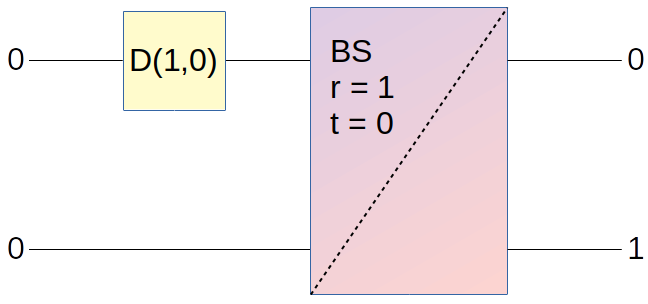